In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DNA_SIZE = 1
DNA_BOUND = [0, 5]
N_GENERATIONS = 200
MUT_STRENGTH = 5.

def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

def get_fitness(pred): return pred.flatten()

In [3]:
# 根据 parent 正态分布生成一个 kid
def make_kid(parent):
    k = parent + MUT_STRENGTH * np.random.randn(DNA_SIZE)
    k = np.clip(k, *DNA_BOUND)
    return k
    
# 淘汰不适应环境的个体
def kill_bad(parent, kid):
    global MUT_STRENGTH
    fp = get_fitness(F(parent))[0]
    fk = get_fitness(F(kid))[0]
    p_target = 1.0/5
    if fp < fk:
        parent = kid
        ps = 1.
    else:
        ps = 0.
    # 调整变异率
    MUT_STRENGTH *= np.exp(1/np.sqrt(DNA_SIZE+1)*(ps-p_target)/(1-p_target))
    return parent
    

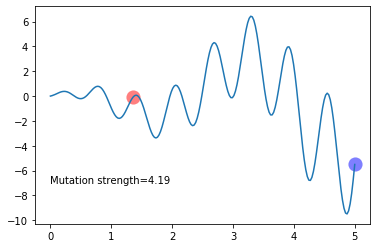

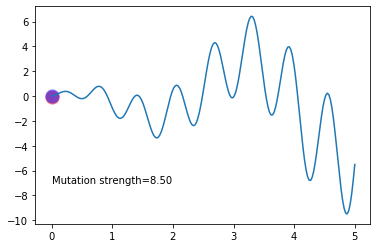

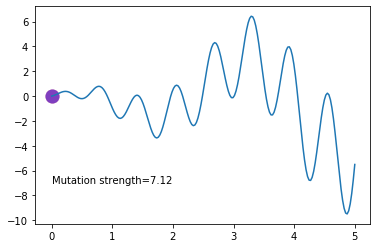

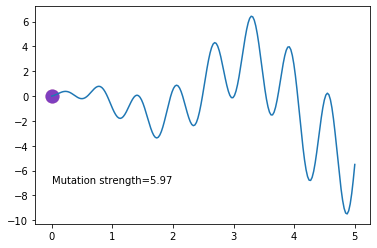

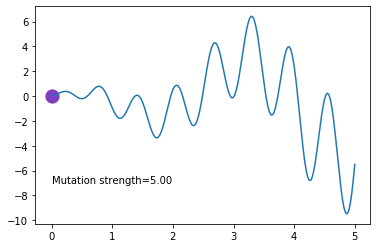

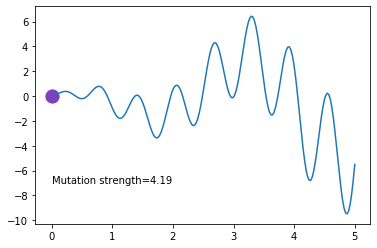

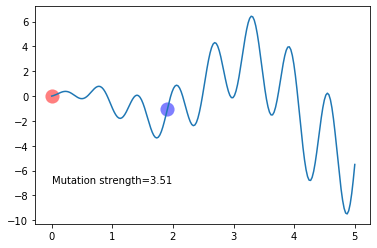

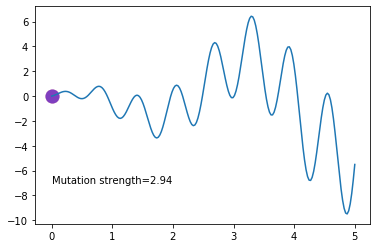

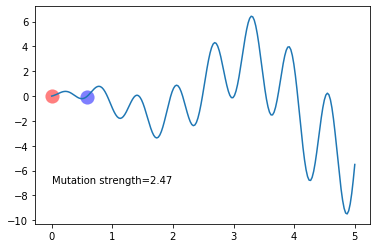

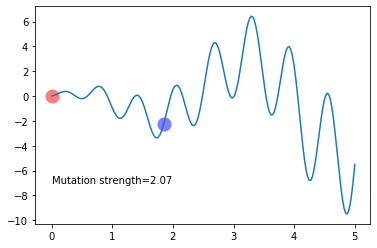

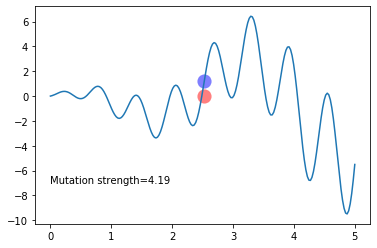

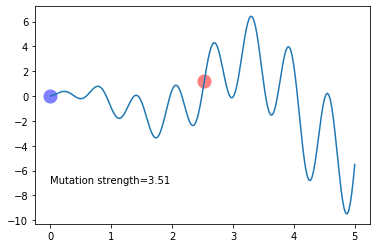

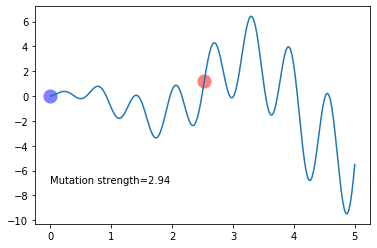

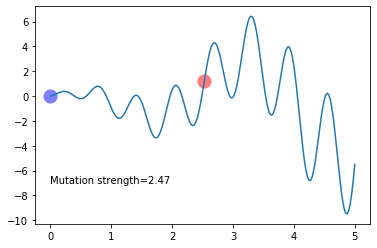

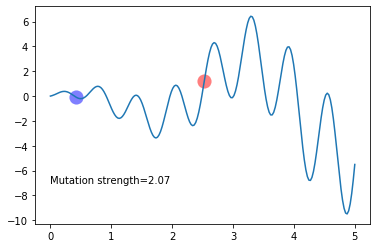

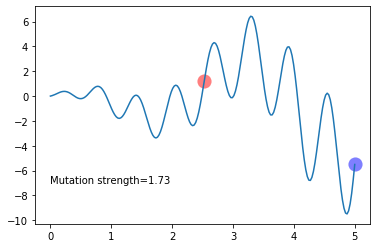

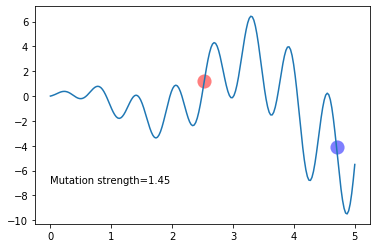

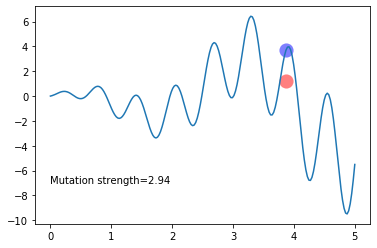

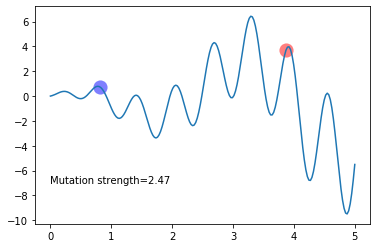

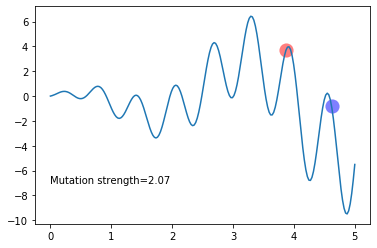

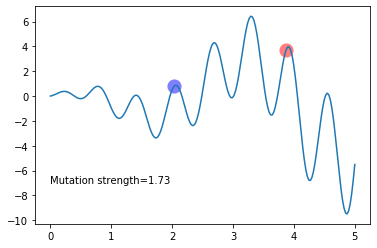

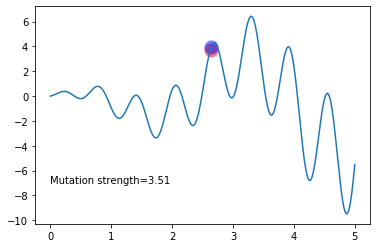

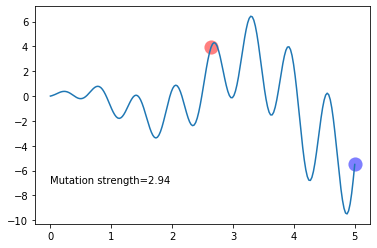

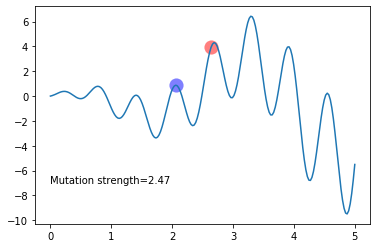

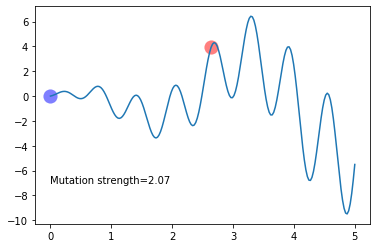

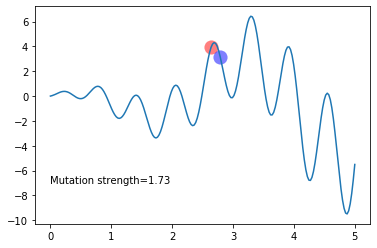

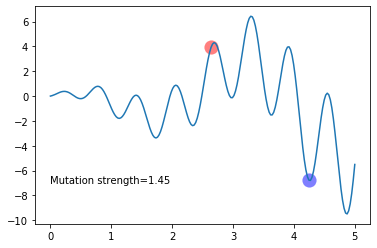

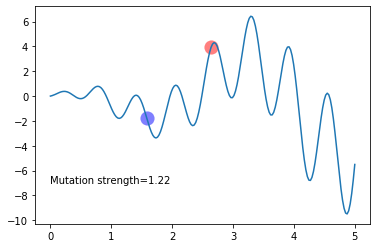

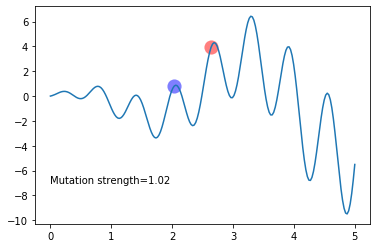

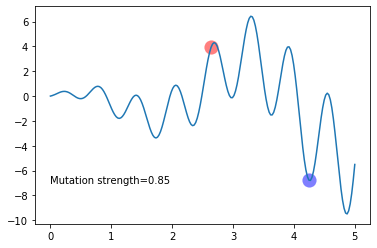

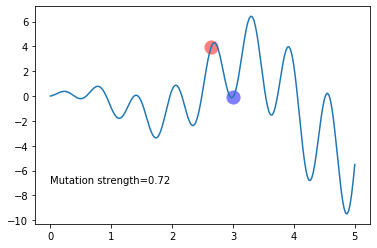

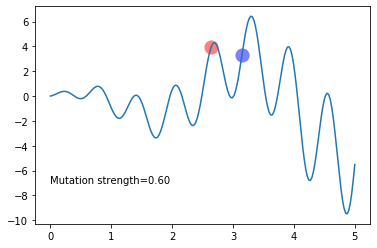

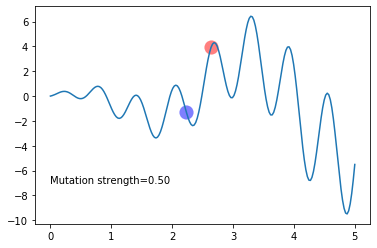

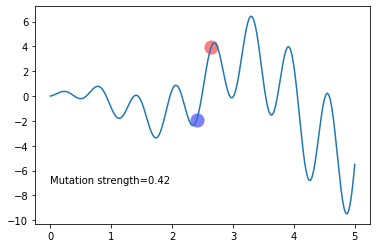

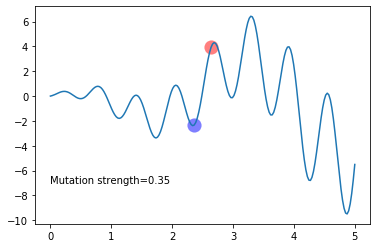

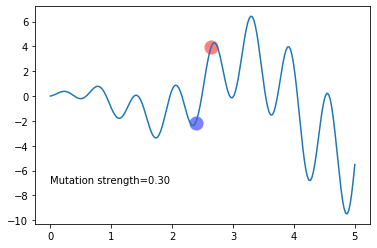

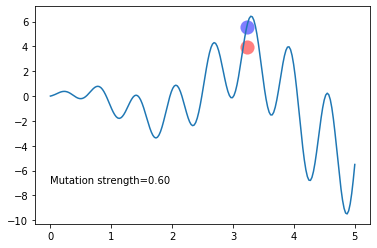

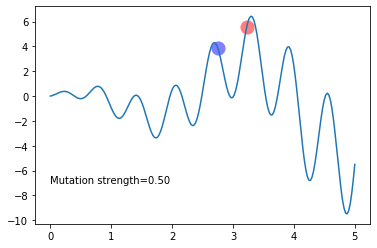

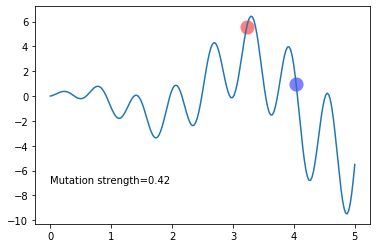

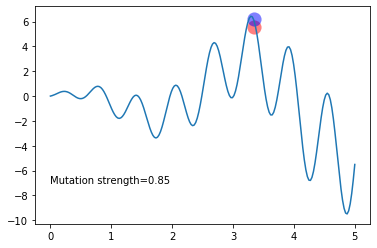

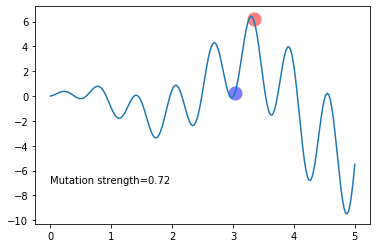

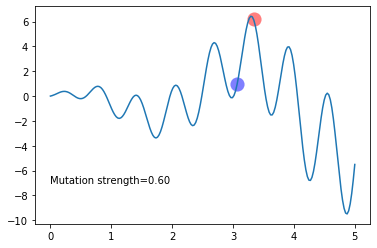

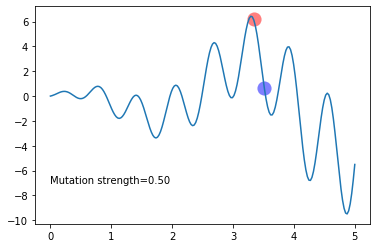

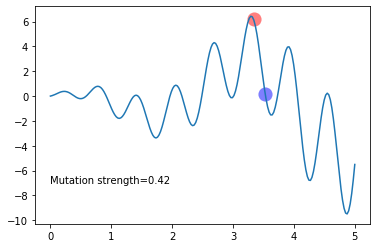

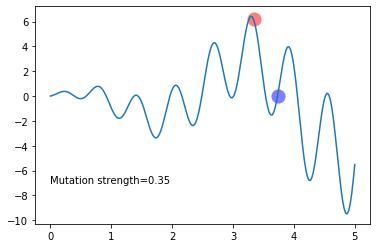

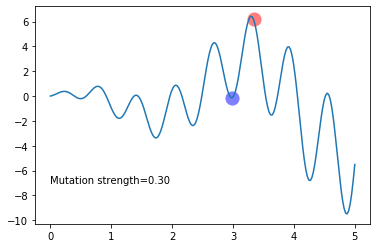

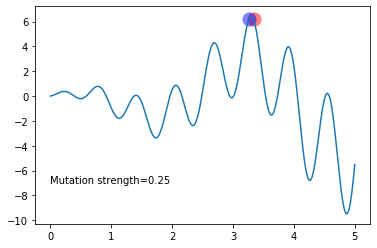

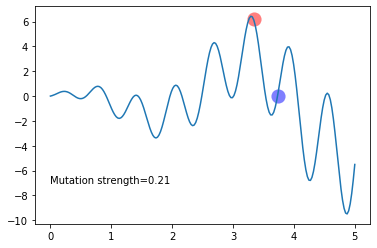

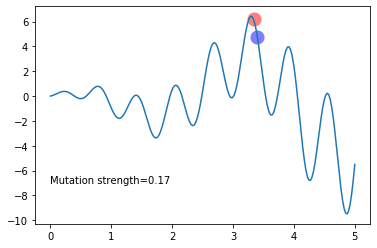

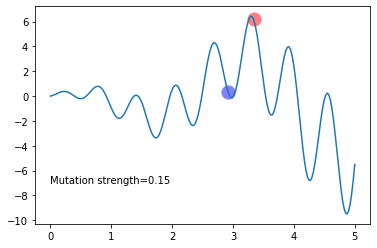

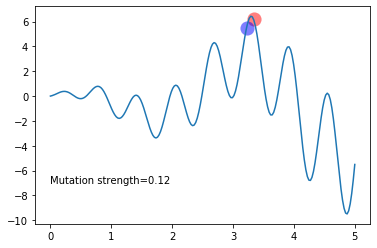

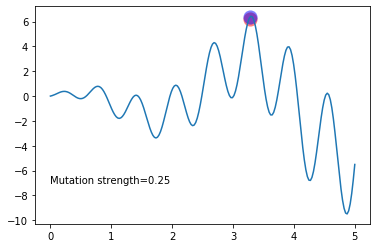

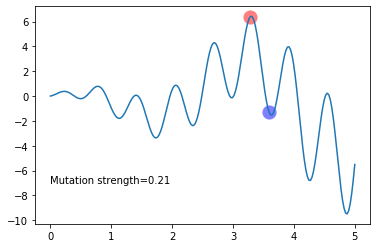

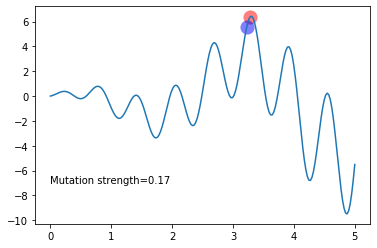

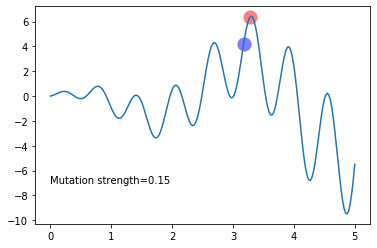

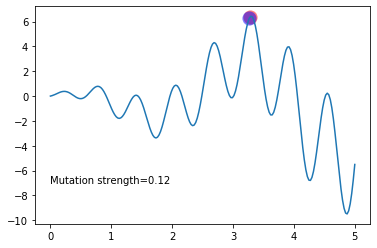

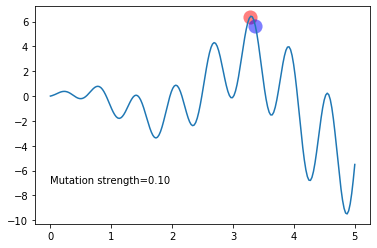

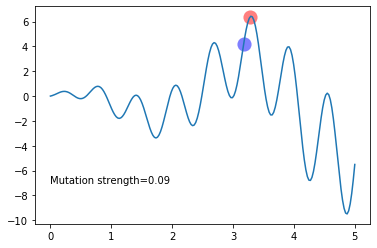

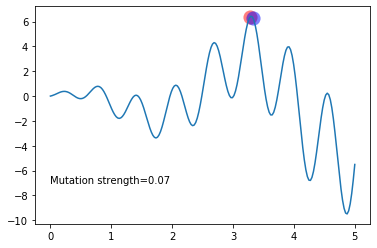

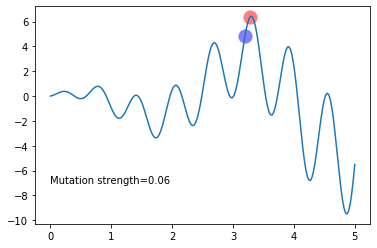

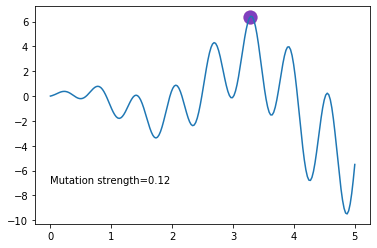

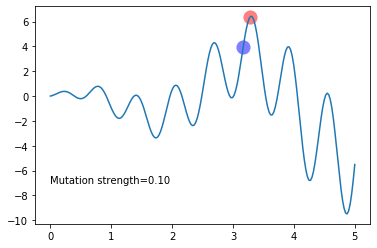

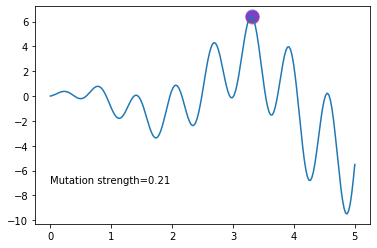

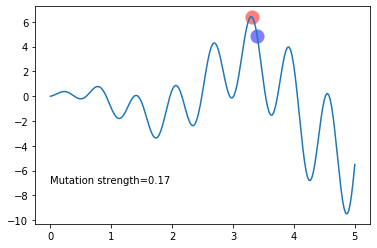

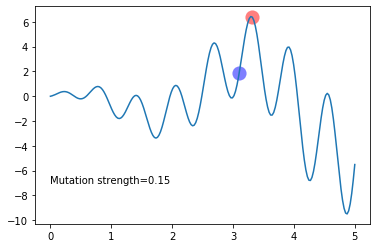

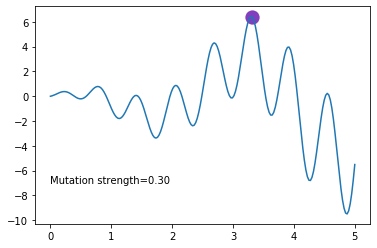

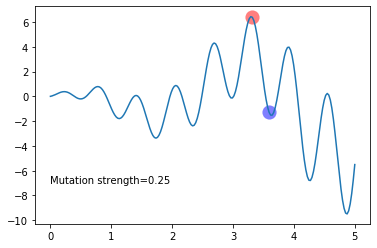

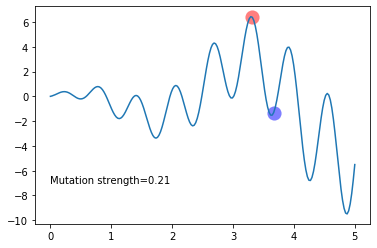

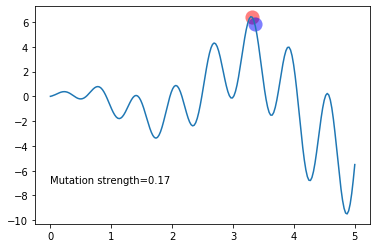

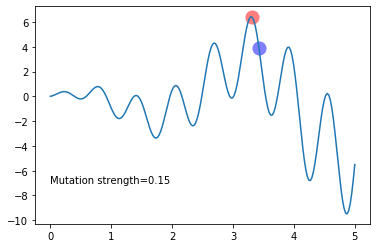

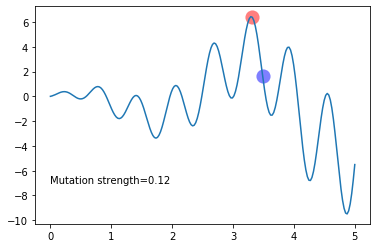

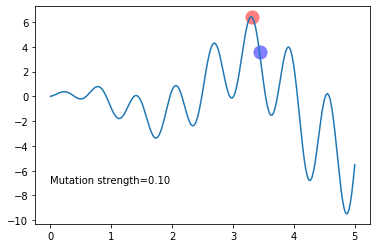

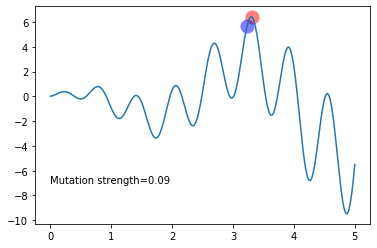

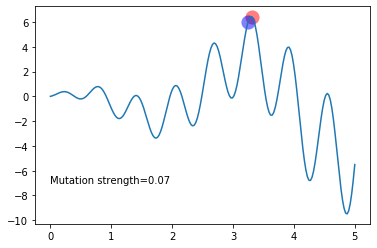

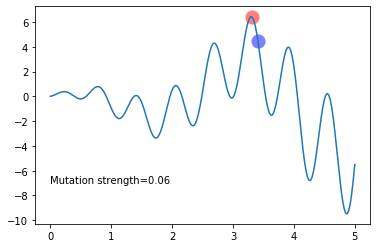

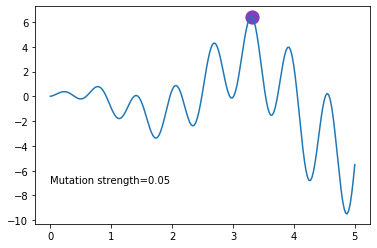

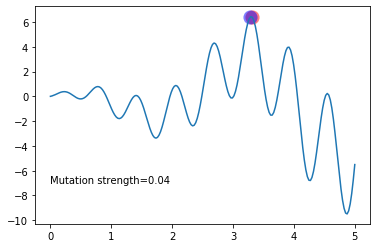

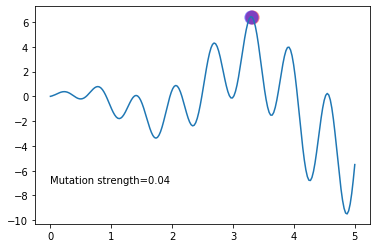

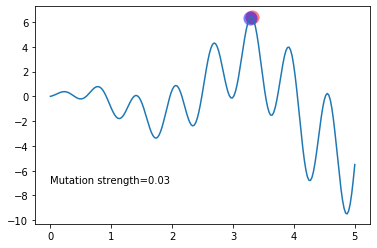

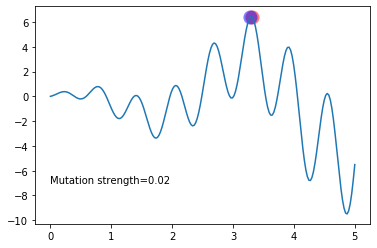

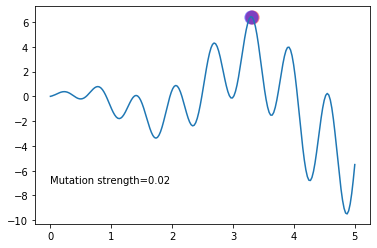

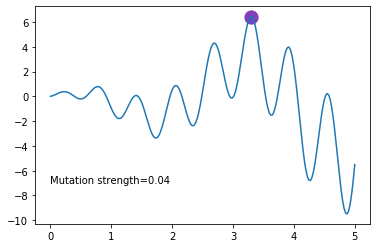

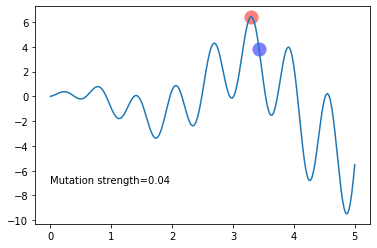

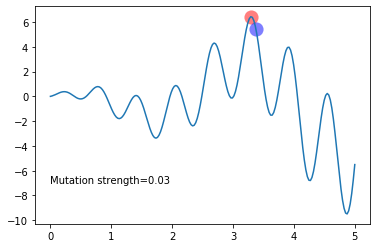

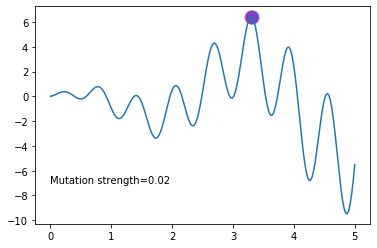

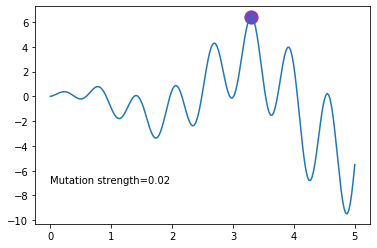

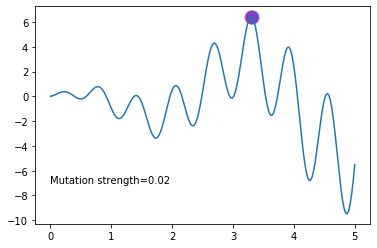

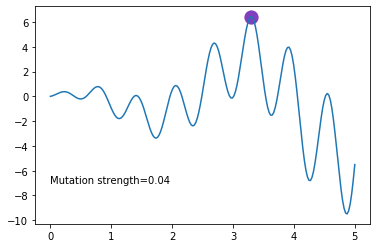

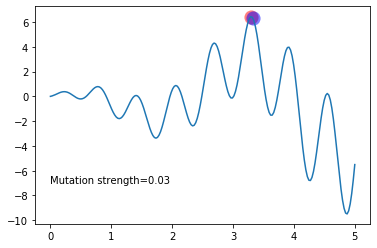

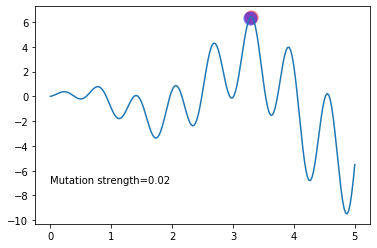

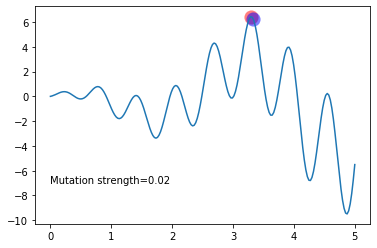

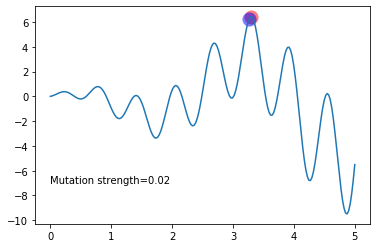

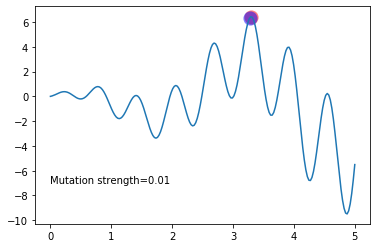

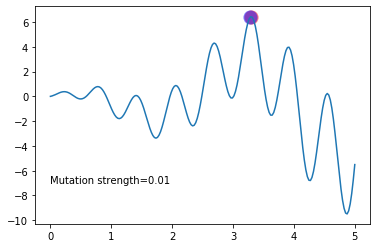

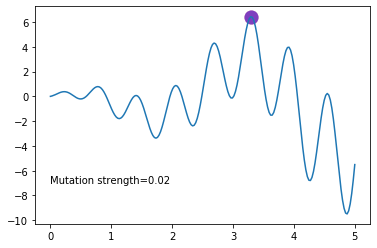

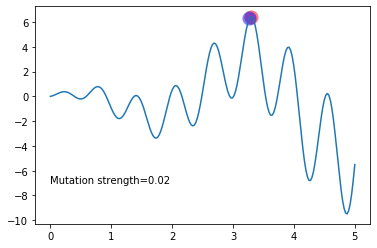

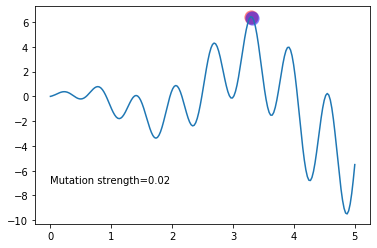

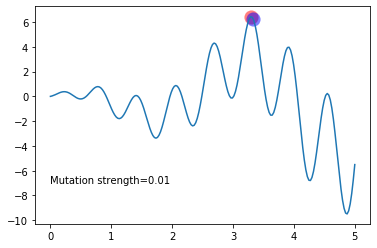

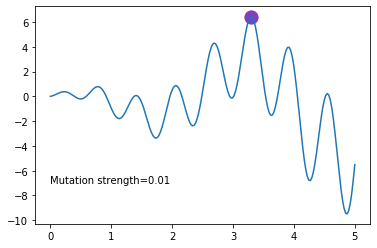

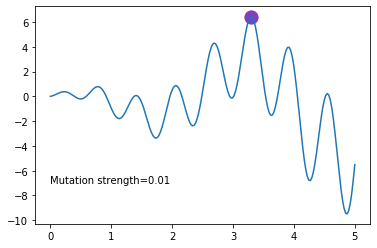

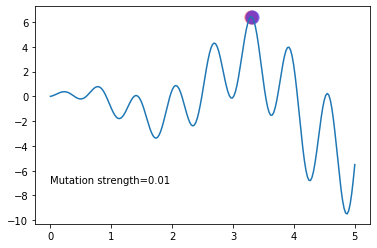

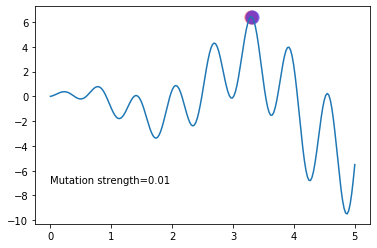

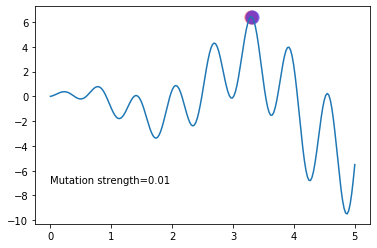

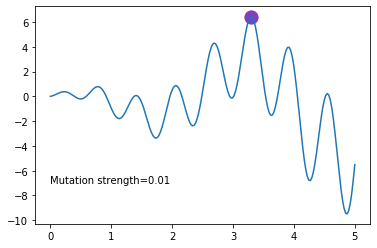

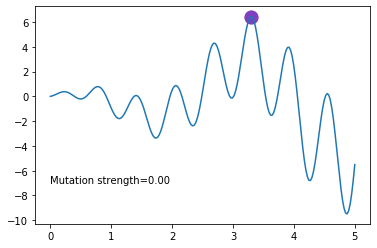

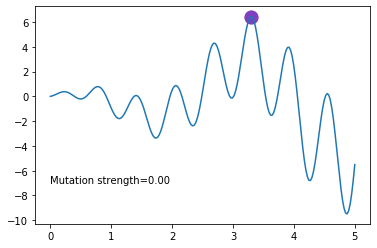

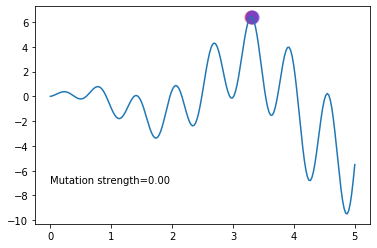

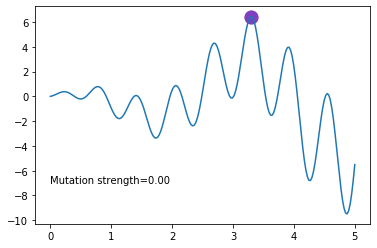

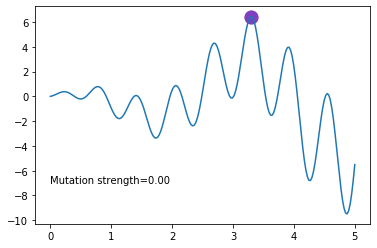

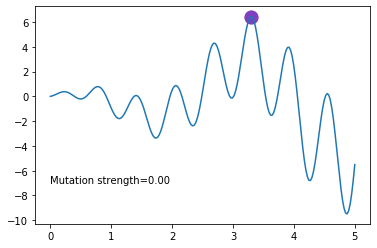

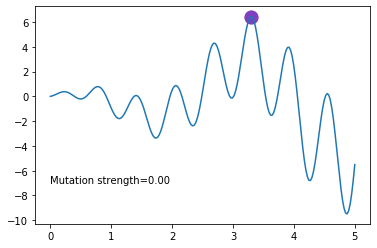

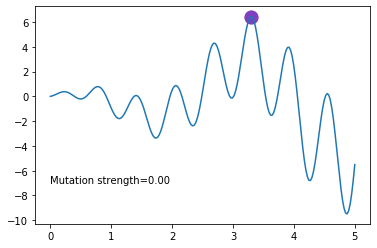

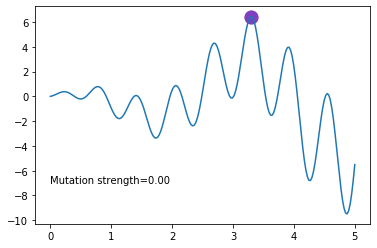

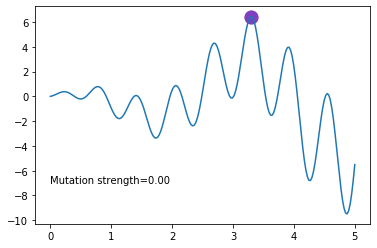

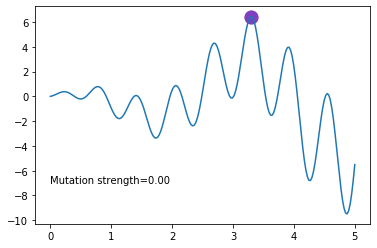

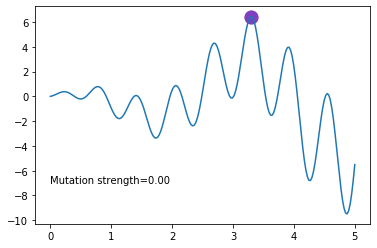

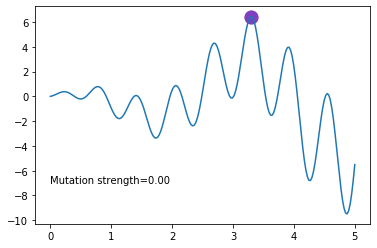

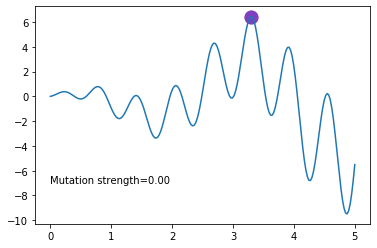

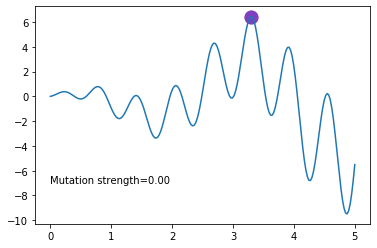

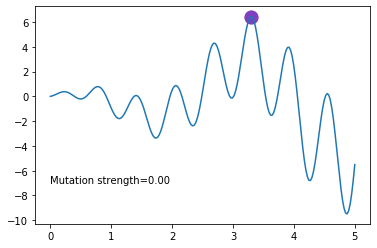

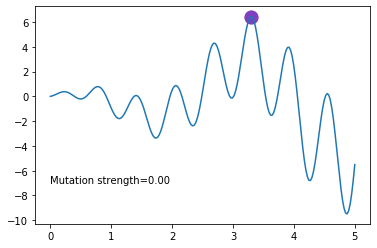

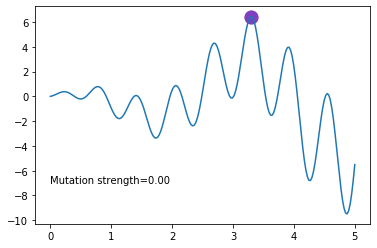

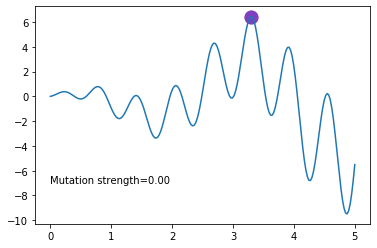

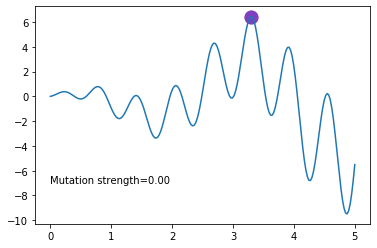

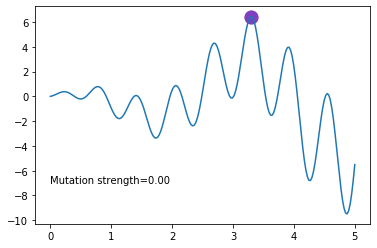

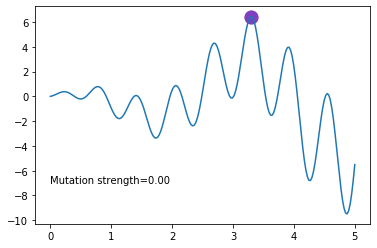

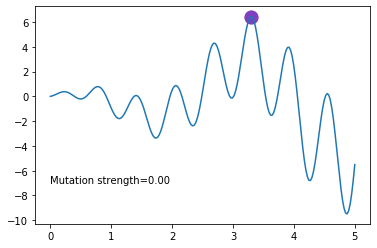

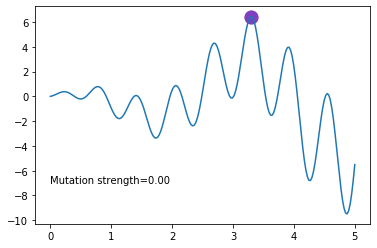

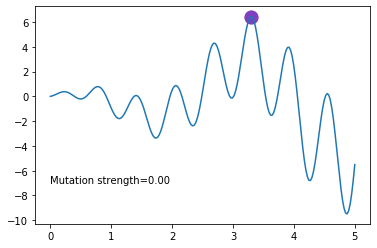

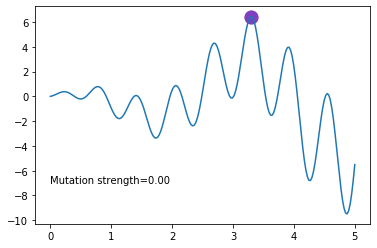

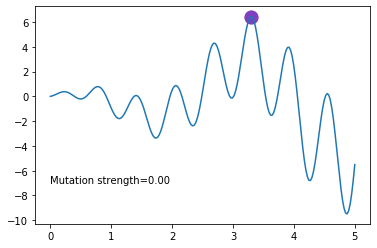

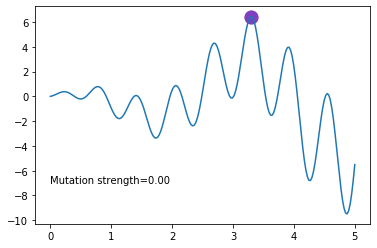

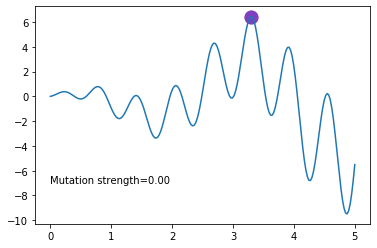

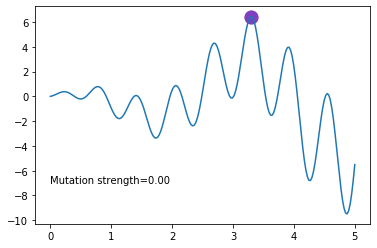

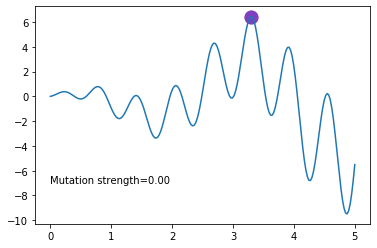

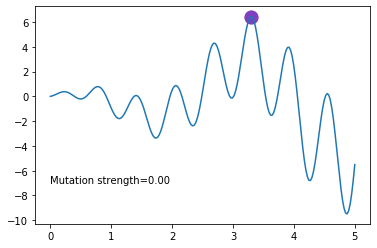

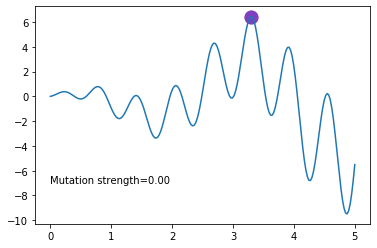

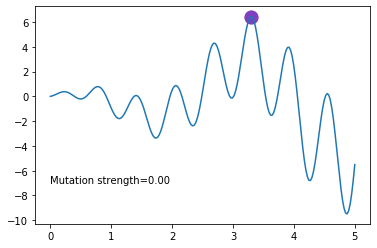

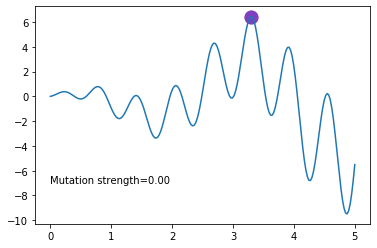

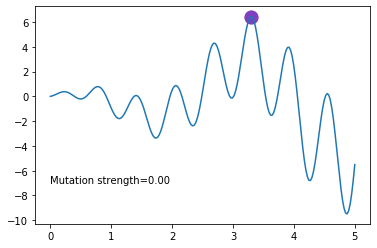

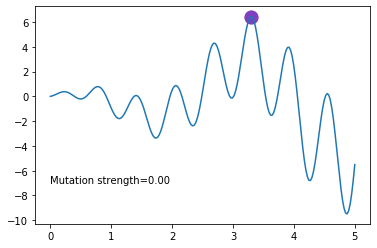

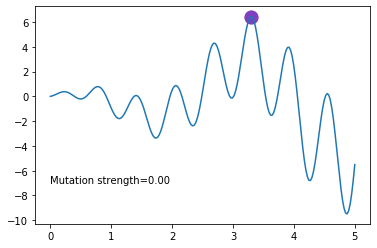

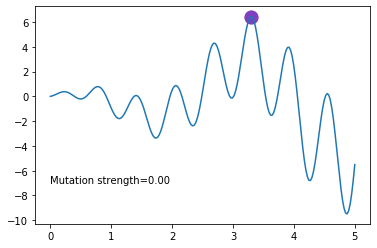

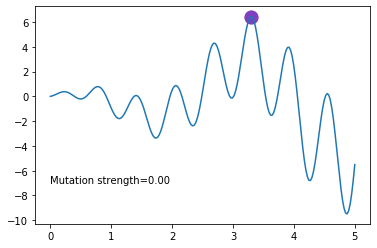

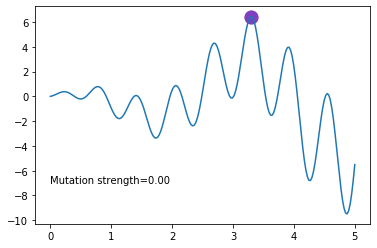

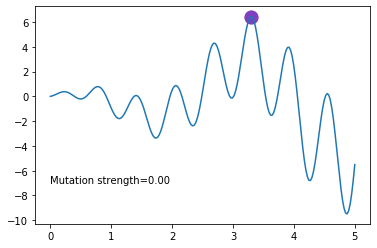

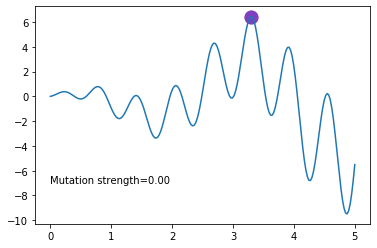

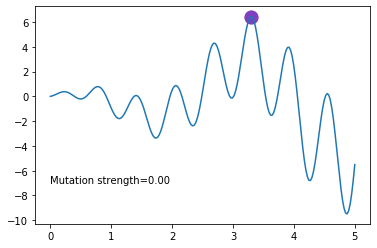

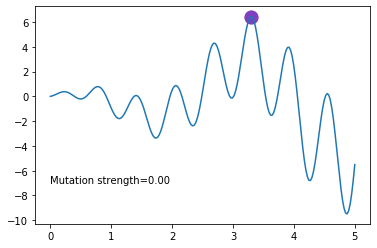

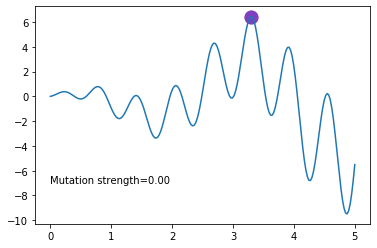

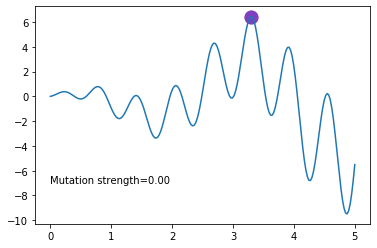

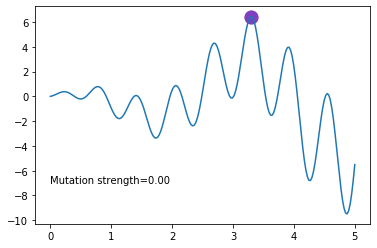

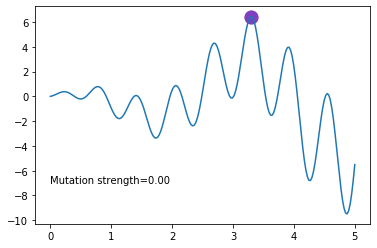

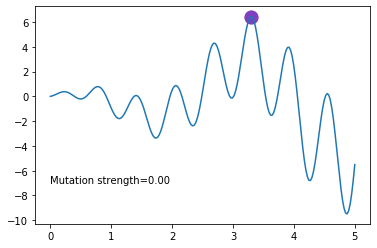

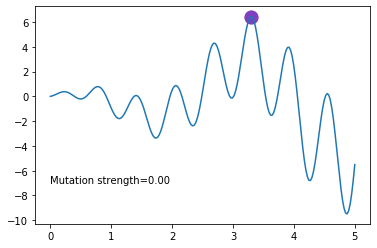

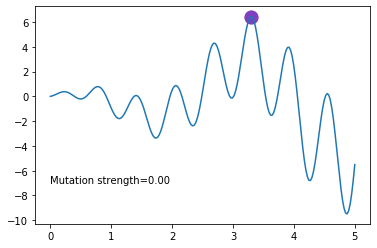

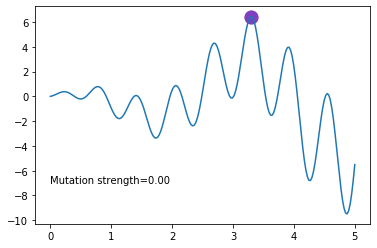

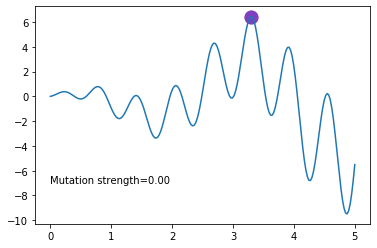

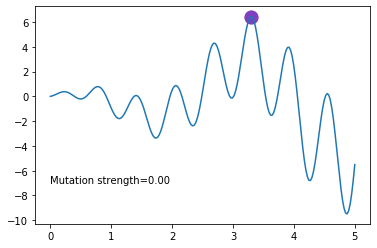

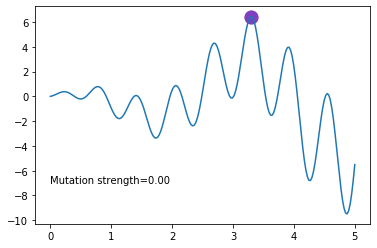

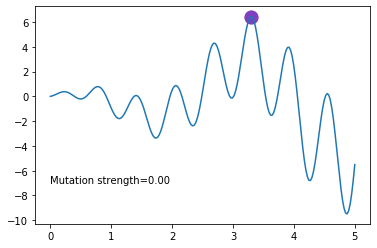

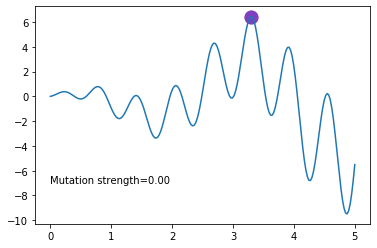

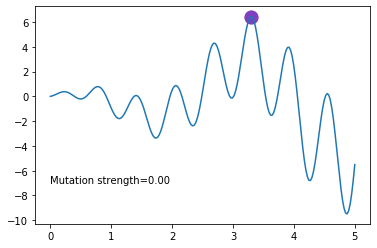

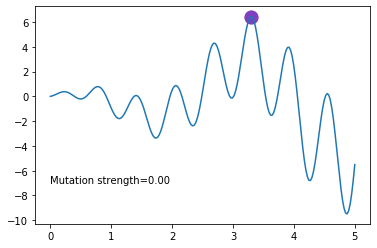

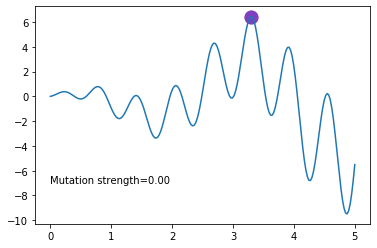

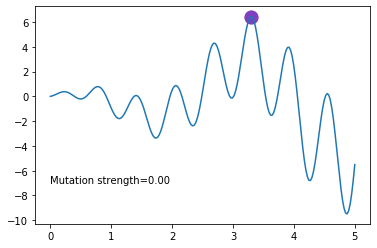

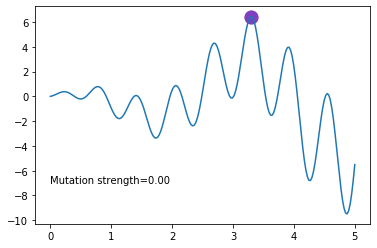

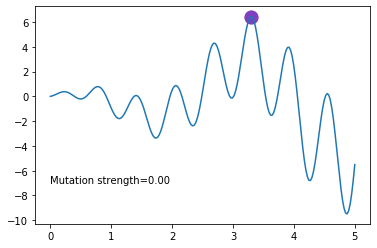

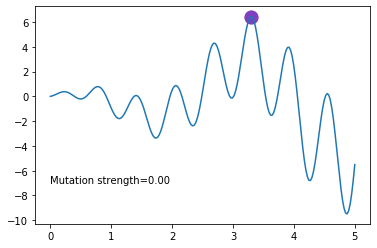

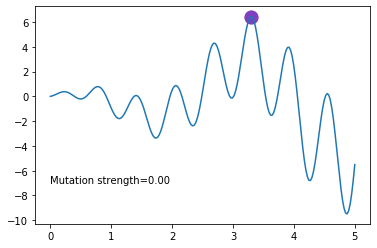

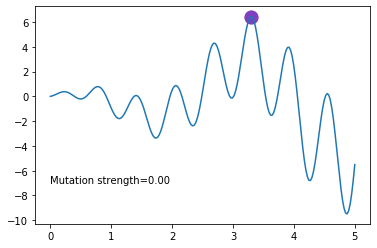

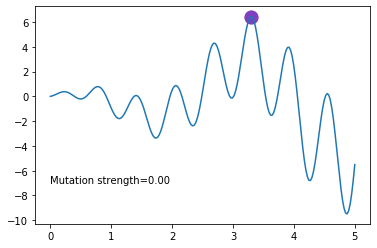

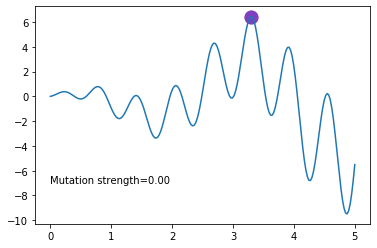

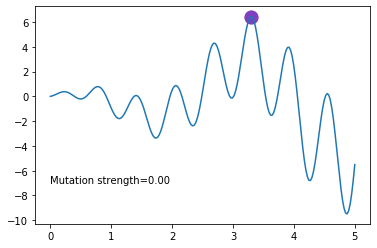

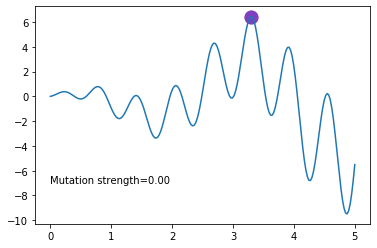

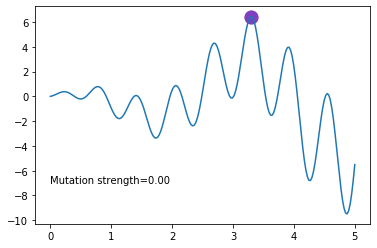

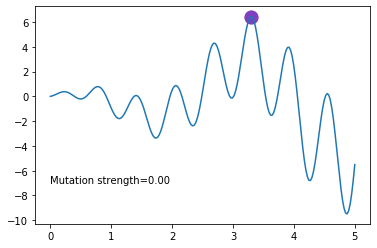

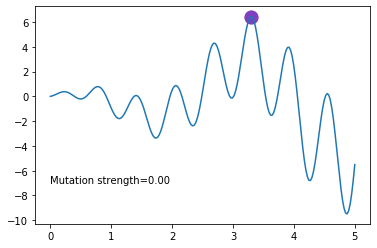

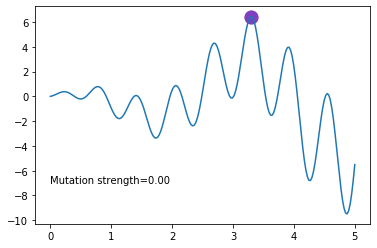

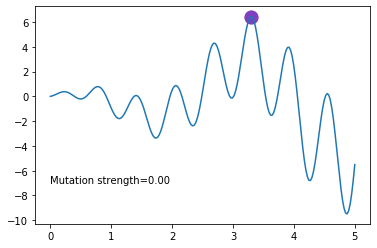

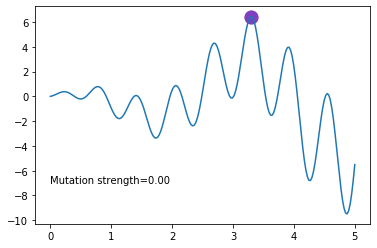

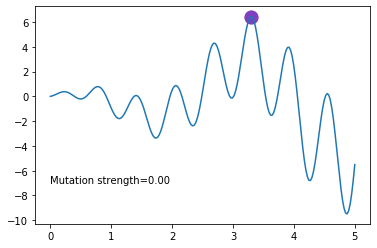

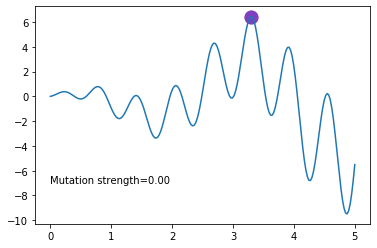

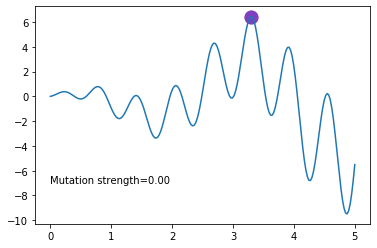

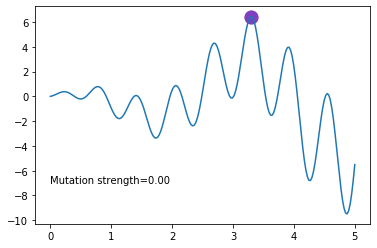

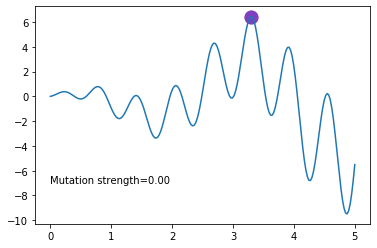

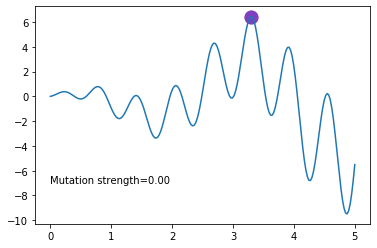

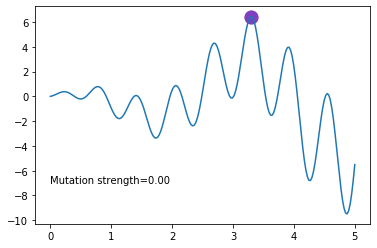

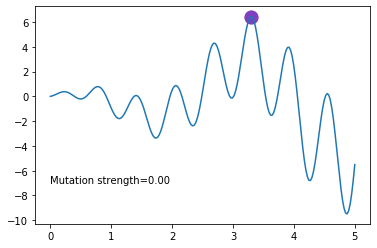

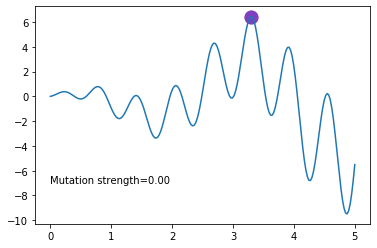

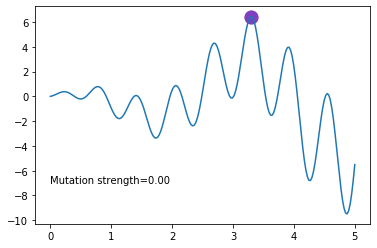

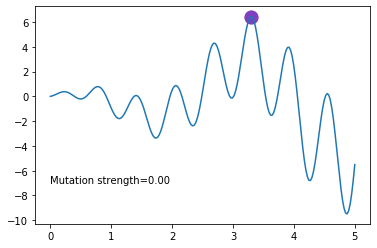

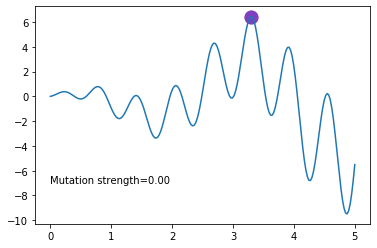

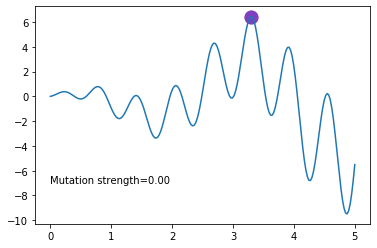

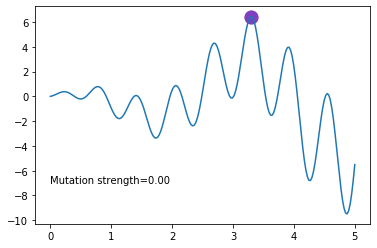

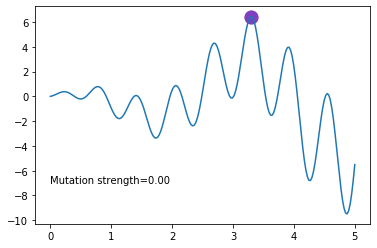

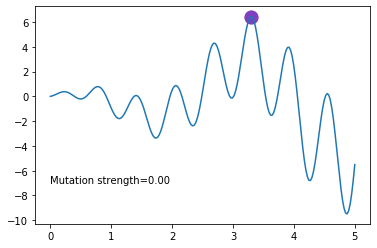

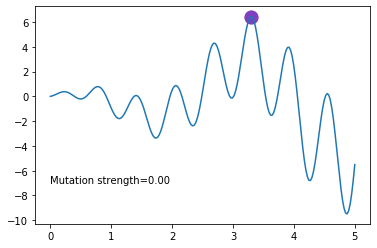

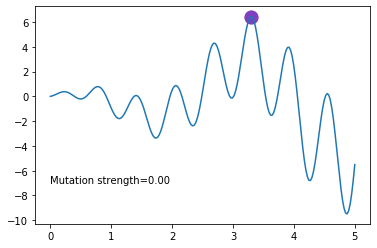

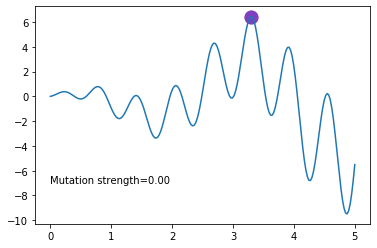

In [4]:
parent = 5 * np.random.rand(DNA_SIZE)
plt.ion()
x = np.linspace(*DNA_BOUND, 200)

for _ in range(N_GENERATIONS):
    # ES part
    kid = make_kid(parent)
    py, ky = F(parent), F(kid)       # for later plot
    parent = kill_bad(parent, kid)

    # something about plotting
    plt.cla()
    plt.scatter(parent, py, s=200, lw=0, c='red', alpha=0.5,)
    plt.scatter(kid, ky, s=200, lw=0, c='blue', alpha=0.5)
    plt.text(0, -7, 'Mutation strength=%.2f' % MUT_STRENGTH)
    plt.plot(x, F(x)); plt.pause(0.05)

plt.ioff(); plt.show()